In [2]:
import xarray as xr
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt 
from matplotlib import ticker, cm
import matplotlib.cm as mcm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from matplotlib.ticker import FuncFormatter
jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')
import netCDF4 as nc
import cartopy.crs as ccrs # CRS stands for "Coordinate reference systems" for map projection
from cartopy.crs import PlateCarree
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter 
import matplotlib.gridspec as gridspec
import os 
import glob
import re
import nc_time_axis
import time 
import dask.array as da

def scientific_formatter(x, pos):
    if x == 0:
        return "$0$"
    exponent = int(np.floor(np.log10(x)))
    base = round(x / 10**exponent)
    if base == 1:
        return f"$10^{{{exponent}}}$"
    else:
        return f"${base} \\times 10^{{{exponent}}}$"


/tmp/ipykernel_958711/2295570219.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  jet = mcm.get_cmap('jet') if isinstance(mcm.get_cmap('jet'), str) else mcm.get_cmap('jet')


# File reading

## Algorithm output for SpE Events

In [3]:
WACCM_UL = 150
ds_months_ar = np.arange(0,3)   

win_Monthfolderstr = 'Dec-Feb'
win_ds_months = ['12','01','02']

spr_Monthfolderstr = 'Mar-May'
spr_ds_months = ['03','04','05']

sum_Monthfolderstr = 'Jun-Aug'
sum_ds_months = ['06','07','08']

aut_Monthfolderstr = 'Sep-Nov'
aut_ds_months = ['09','10','11']

run_name = 'Solar_Comp'

filename_append = '0.25sigma_2xMpza_1xpeak'     

#----------------------------------------------------------------------------------------

win_file_med = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_med = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_med = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_med = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/SpE_Algorithm_Output_yr2000/Wuhu_IonTr_run_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_med = xr.open_dataset(win_file_med, decode_times=False)
ds_spr_med = xr.open_dataset(spr_file_med, decode_times=False)
ds_sum_med = xr.open_dataset(sum_file_med, decode_times=False)
ds_aut_med = xr.open_dataset(aut_file_med, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_min = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_min = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_min = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_min = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/SpE_Algorithm_Output_yr2000/SMin_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_min = xr.open_dataset(win_file_min, decode_times=False)
ds_spr_min = xr.open_dataset(spr_file_min, decode_times=False)
ds_sum_min = xr.open_dataset(sum_file_min, decode_times=False)
ds_aut_min = xr.open_dataset(aut_file_min, decode_times=False)

#----------------------------------------------------------------------------------------

win_file_max = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
spr_file_max = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
sum_file_max = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
aut_file_max = f'/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/SpE_Algorithm_Output_yr2000/SMax_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

ds_win_max = xr.open_dataset(win_file_max, decode_times=False)
ds_spr_max = xr.open_dataset(spr_file_max, decode_times=False)
ds_sum_max = xr.open_dataset(sum_file_max, decode_times=False)
ds_aut_max = xr.open_dataset(aut_file_max, decode_times=False)

#----------------------------------------------------------------------------------------

# os.chdir('/nobackup')
# win_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{win_Monthfolderstr}_90-150km_{filename_append}.nc'
# spr_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{spr_Monthfolderstr}_90-150km_{filename_append}.nc'
# sum_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{sum_Monthfolderstr}_90-150km_{filename_append}.nc'
# aut_file_cli = f'/nobackup/cm21cmr/cli_cha_SpE_Output_{aut_Monthfolderstr}_90-150km_{filename_append}.nc'

# ds_win_cli = xr.open_dataset(win_file_cli, decode_times=False)
# ds_spr_cli = xr.open_dataset(spr_file_cli, decode_times=False)
# ds_sum_cli = xr.open_dataset(sum_file_cli, decode_times=False)
# ds_aut_cli = xr.open_dataset(aut_file_cli, decode_times=False)

# #----------------------------------------------------------------------------------------

# ds_sum_cli

## Raw datasets for temp, chemical species, wind etc

In [9]:
# define function which computes monthly / seasonal averages of a given variable 
def process_nc_files(file_pattern, regex, var):
    
    # Find and group files by month
    file_paths = sorted(glob.glob(file_pattern))
    files_by_month = {}
    monthly_averages = {}
    seasonal_averages = {season: [] for season in ["spring", "summer", "autumn", "winter"]}

    for file_path in file_paths:
        match = re.search(regex, file_path)
        if match:
            month = int(match.group(1))  # Extract month
            files_by_month.setdefault(month, []).append(file_path)
        else:
            print(f"Skipping file with unexpected format: {file_path}")

    # Compute monthly averages
    for month, files in files_by_month.items():
        print(f"Processing month {month} with {len(files)} files.")
        ds = xr.open_mfdataset(files, combine='by_coords')
        if var in ds:
            monthly_averages[month] = ds[var].mean(dim='time')
        else:
            print(f"Variable {var} not found in files for month {month}.")
        ds.close()

    # Compute seasonal averages
    season_months = {"spring": [3, 4, 5], "summer": [6, 7, 8], "autumn": [9, 10, 11], "winter": [12, 1, 2]}
    for season, months in season_months.items():
        seasonal_data = [monthly_averages[month] for month in months if month in monthly_averages]
        if seasonal_data:
            seasonal_averages[season] = sum(seasonal_data) / len(seasonal_data)

    # Print summary
    print("Monthly Averages:", list(monthly_averages.keys()))
    print("Seasonal Averages:", list(seasonal_averages.keys()))

    # Create a list to hold monthly DataArrays
    monthly_data = []
    for month in range(1, 13):  # Loop through months 1 to 12
        if month in monthly_averages:
            da = monthly_averages[month]
            da = da.expand_dims(dim={'month': [month]})  # Add a 'month' dimension
            monthly_data.append(da)
        else:
            if len(monthly_data) > 0:
                template = monthly_data[0]
                nan_da = xr.full_like(template, np.nan).expand_dims(dim={'month': [month]})
                monthly_data.append(nan_da)

    # Combine all monthly DataArrays along the 'month' dimension
    result = xr.concat(monthly_data, dim='month')

    # change 'lev' to 'altavg' / km based on ds_medsum
    result = result.assign_coords(altavg=ds_sum_med['altavg']).swap_dims({'lev':'altavg'})

    # Check the resulting DataArray
    print(result)
    return result


In [10]:
fjhbhj='/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h1.0001-02-01-00000.nc'
fjhbhjn= xr.open_mfdataset(fjhbhj, decode_times = False)
fjhbhjn

<xarray.Dataset>
Dimensions:       (lat: 96, lon: 144, lev: 126, ilev: 127, time: 24, nbnd: 2)
Coordinates:
  * lat           (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon           (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lev           (lev) float64 4.055e-10 5.207e-10 6.686e-10 ... 970.6 992.6
  * ilev          (ilev) float64 3.551e-10 4.559e-10 5.854e-10 ... 985.1 1e+03
  * time          (time) float64 31.0 31.04 31.08 31.12 ... 31.88 31.92 31.96
Dimensions without coordinates: nbnd
Data variables: (12/44)
    gw            (lat) float64 dask.array<chunksize=(96,), meta=np.ndarray>
    hyam          (lev) float64 dask.array<chunksize=(126,), meta=np.ndarray>
    hybm          (lev) float64 dask.array<chunksize=(126,), meta=np.ndarray>
    P0            float64 ...
    hyai          (ilev) float64 dask.array<chunksize=(127,), meta=np.ndarray>
    hybi          (ilev) float64 dask.array<chunksize=(127,), meta=np.ndarray>
    ...            ...
    OMEGA         (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    T             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    U             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    V             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    Z3            (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
    e             (time, lev, lat, lon) float32 dask.array<chunksize=(24, 126, 96, 144), meta=np.ndarray>
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              SMax_3M_FX2000_f19f19mg16
    logname:           sestay
    host:              d13s2b4.arc4.lee
    initial_file:      /nobackup/earfw/acp-21-15619-2021/new_Na_Fe_Mg_Si_K_Ca...
    topography_file:   /nobackup/earfw/cesm2_inputdata//atm/cam/topo/USGS-gto...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  hour_1

In [64]:
variable = 'Na'

In [65]:
  # Replace with your desired variable name 
run_name = 'Solar Med' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_med = process_nc_files(file_pattern, regex, variable)

Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-01.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-02.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-03.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-04.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_CESM213_FX2000_f19_f19_mg16_Na_Fe_Mg_iontransport.cam.h0.0001-05.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/ACP_

In [66]:
run_name = 'Climate Change' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_cli = process_nc_files(file_pattern, regex, variable)

Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-01.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-02.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-03.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-04.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.h0.2100-05.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/FX2100f19f19mg16NaFeMgiontransport.cam.

In [67]:
run_name = 'Solar Max' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_max = process_nc_files(file_pattern, regex, variable)

Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-01.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-02.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-03.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-04.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-05.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/SMax_3M_FX2000_f19f19mg16.cam.h0.0001-06.nc
Skipping file with unexpected format: /uolstor

In [68]:
run_name = 'Solar Min' # OR # 'Solar Med'
                            # 'Solar Max'
                            # 'Solar Min'
                            # 'Climate Change' 

if run_name == 'Solar Med':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Med/archive_yr2000/*.nc'
    regex = r'.*h2\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Max':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Max/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Solar Min':
    file_pattern = '/uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/*.nc'
    regex = r'.*h1\.0001-(\d{2})-(\d{2})-\d{5}\.nc'

elif run_name == 'Climate Change':
    file_pattern = '/uolstore/Research/b/b0243/Data/earfw/FX2100f19f19mg16NaFeMgiontransport/hist/*.nc'
    regex = r'.*h2\.2100-(\d{2})-(\d{2})-\d{5}\.nc'


ds_min = process_nc_files(file_pattern, regex, variable)

Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-01.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-02.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-03.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-04.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-05.nc
Skipping file with unexpected format: /uolstore/Research/b/b0243/Data/Sporadic_E/Solar_Min/archive_yr2000/atm/hist/SMin_3M_FX2000_f19f19mg16.cam.h0.0001-06.nc
Skipping file with unexpected format: /uolstor

In [69]:
selected_month = 7  # Change this to plot other months
selected_alt = 100 # km
var = variable

if selected_month in ds_cli['month']:
    ds_cli = ds_cli.sel(month=selected_month, drop=False)
    
    if 'altavg' in ds_cli.dims:
        ds_2dcli = ds_cli.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dcli = ds_cli    
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dcli= ds_2dcli.mean(dim=[dim for dim in ds_2dcli.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dcli['lat'].values
    lon = ds_2dcli['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dcli.dims)
    print(f"Shape of {var}_month_2d:", ds_2dcli.shape)

if selected_month in ds_med['month']:
    ds_med = ds_med.sel(month=selected_month)
    
    if 'altavg' in ds_med.dims:
        ds_2dmed = ds_med.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmed = ds_med  
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmed= ds_2dmed.mean(dim=[dim for dim in ds_2dmed.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmed['lat'].values
    lon = ds_2dmed['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmed.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmed.shape)

if selected_month in ds_max['month']:
    ds_max = ds_max.sel(month=selected_month)
    
    if 'altavg' in ds_max.dims:
        ds_2dmax = ds_max.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmax = ds_max  
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmax= ds_2dmax.mean(dim=[dim for dim in ds_2dmax.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmax['lat'].values
    lon = ds_2dmax['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmax.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmax.shape)

if selected_month in ds_min['month']:
    ds_min = ds_min.sel(month=selected_month)
    
    if 'altavg' in ds_min.dims:
        ds_2dmin = ds_min.sel(altavg=selected_alt, method='nearest')
    else:
        ds_2dmin = ds_min 
   
    # Ensure no residual dimensions other than lat and lon
    ds_2dmin= ds_2dmin.mean(dim=[dim for dim in ds_2dmin.dims if dim not in ['lat', 'lon']])
    
    # Extract latitude and longitude
    lat = ds_2dmin['lat'].values
    lon = ds_2dmin['lon'].values
    
    # Check dimensions
    print(f"Dimensions of {var}_month_2d:", ds_2dmin.dims)
    print(f"Shape of {var}_month_2d:", ds_2dmin.shape)

Dimensions of Na_month_2d: ('lat', 'lon')
Shape of Na_month_2d: (96, 144)
Dimensions of Na_month_2d: ('lat', 'lon')
Shape of Na_month_2d: (96, 144)
Dimensions of Na_month_2d: ('lat', 'lon')
Shape of Na_month_2d: (96, 144)
Dimensions of Na_month_2d: ('lat', 'lon')
Shape of Na_month_2d: (96, 144)


In [70]:
from dask.distributed import Client
client = Client()

/localhome/cm21cmr/miniconda3/envs/env/lib/python3.12/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 40613 instead
  warnings.warn(


In [71]:
ds_2dmed = ds_2dmed.chunk({'lat': 50, 'lon': 50})  # Adjust chunk sizes based on your dataset
ds_2dcli = ds_2dcli.chunk({'lat': 50, 'lon': 50})
ds_2dmax = ds_2dmax.chunk({'lat': 50, 'lon': 50})
ds_2dmin = ds_2dmin.chunk({'lat': 50, 'lon': 50})

In [72]:
ds_2dmed = ds_2dmed.compute()
print('First one done...')
ds_2dcli = ds_2dcli.compute()
print('Getting there...')
ds_2dmax = ds_2dmax.compute()
print('Finish line in sight...')
ds_2dmin = ds_2dmin.compute()
print('Yippee!!!!')

First one done...
Getting there...
Finish line in sight...
Yippee!!!!


In [73]:
# ds_diff = (ds_2dcliT - ds_2dmedT)

In [74]:
# fig , ax = plt.subplots(figsize=(10,6), subplot_kw={'projection': ccrs.PlateCarree()})

# contour = ax.contour(lon, 
#                       lat, 
#                       ds_diff, 
#                       # colors='black',
#                       cmap = plt.get_cmap('coolwarm'),
#                       transform=ccrs.PlateCarree(), 
#                       #levels=np.linspace(ds_diff.min().values, ds_diff.max().values, 20)
#                     norm=colors.TwoSlopeNorm(vcenter=0)
#                      )
# cbar = plt.colorbar(contour, ax=ax, orientation='vertical', pad=0.05, aspect=30)
# ax.coastlines()
# ax.gridlines(draw_labels=True,
#              dms=True,
#              x_inline=False,
#              y_inline=False
#             )
# plt.clabel(contour, inline=True, fontsize=10)
# ax.set_title(f'Difference (Year 2100 - SMed) in Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km')
# # plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/diff_{var}_alt_{selected_alt}_month_{selected_month}', dpi=400, bbox_inches='tight')
# plt.show()

<cartopy.mpl.contour.GeoContourSet object at 0x7f88d2507a70> done!
<cartopy.mpl.contour.GeoContourSet object at 0x7f88c9b74530> done!
<cartopy.mpl.contour.GeoContourSet object at 0x7f89710d29f0> done!
<cartopy.mpl.contour.GeoContourSet object at 0x7f89709690d0> done!


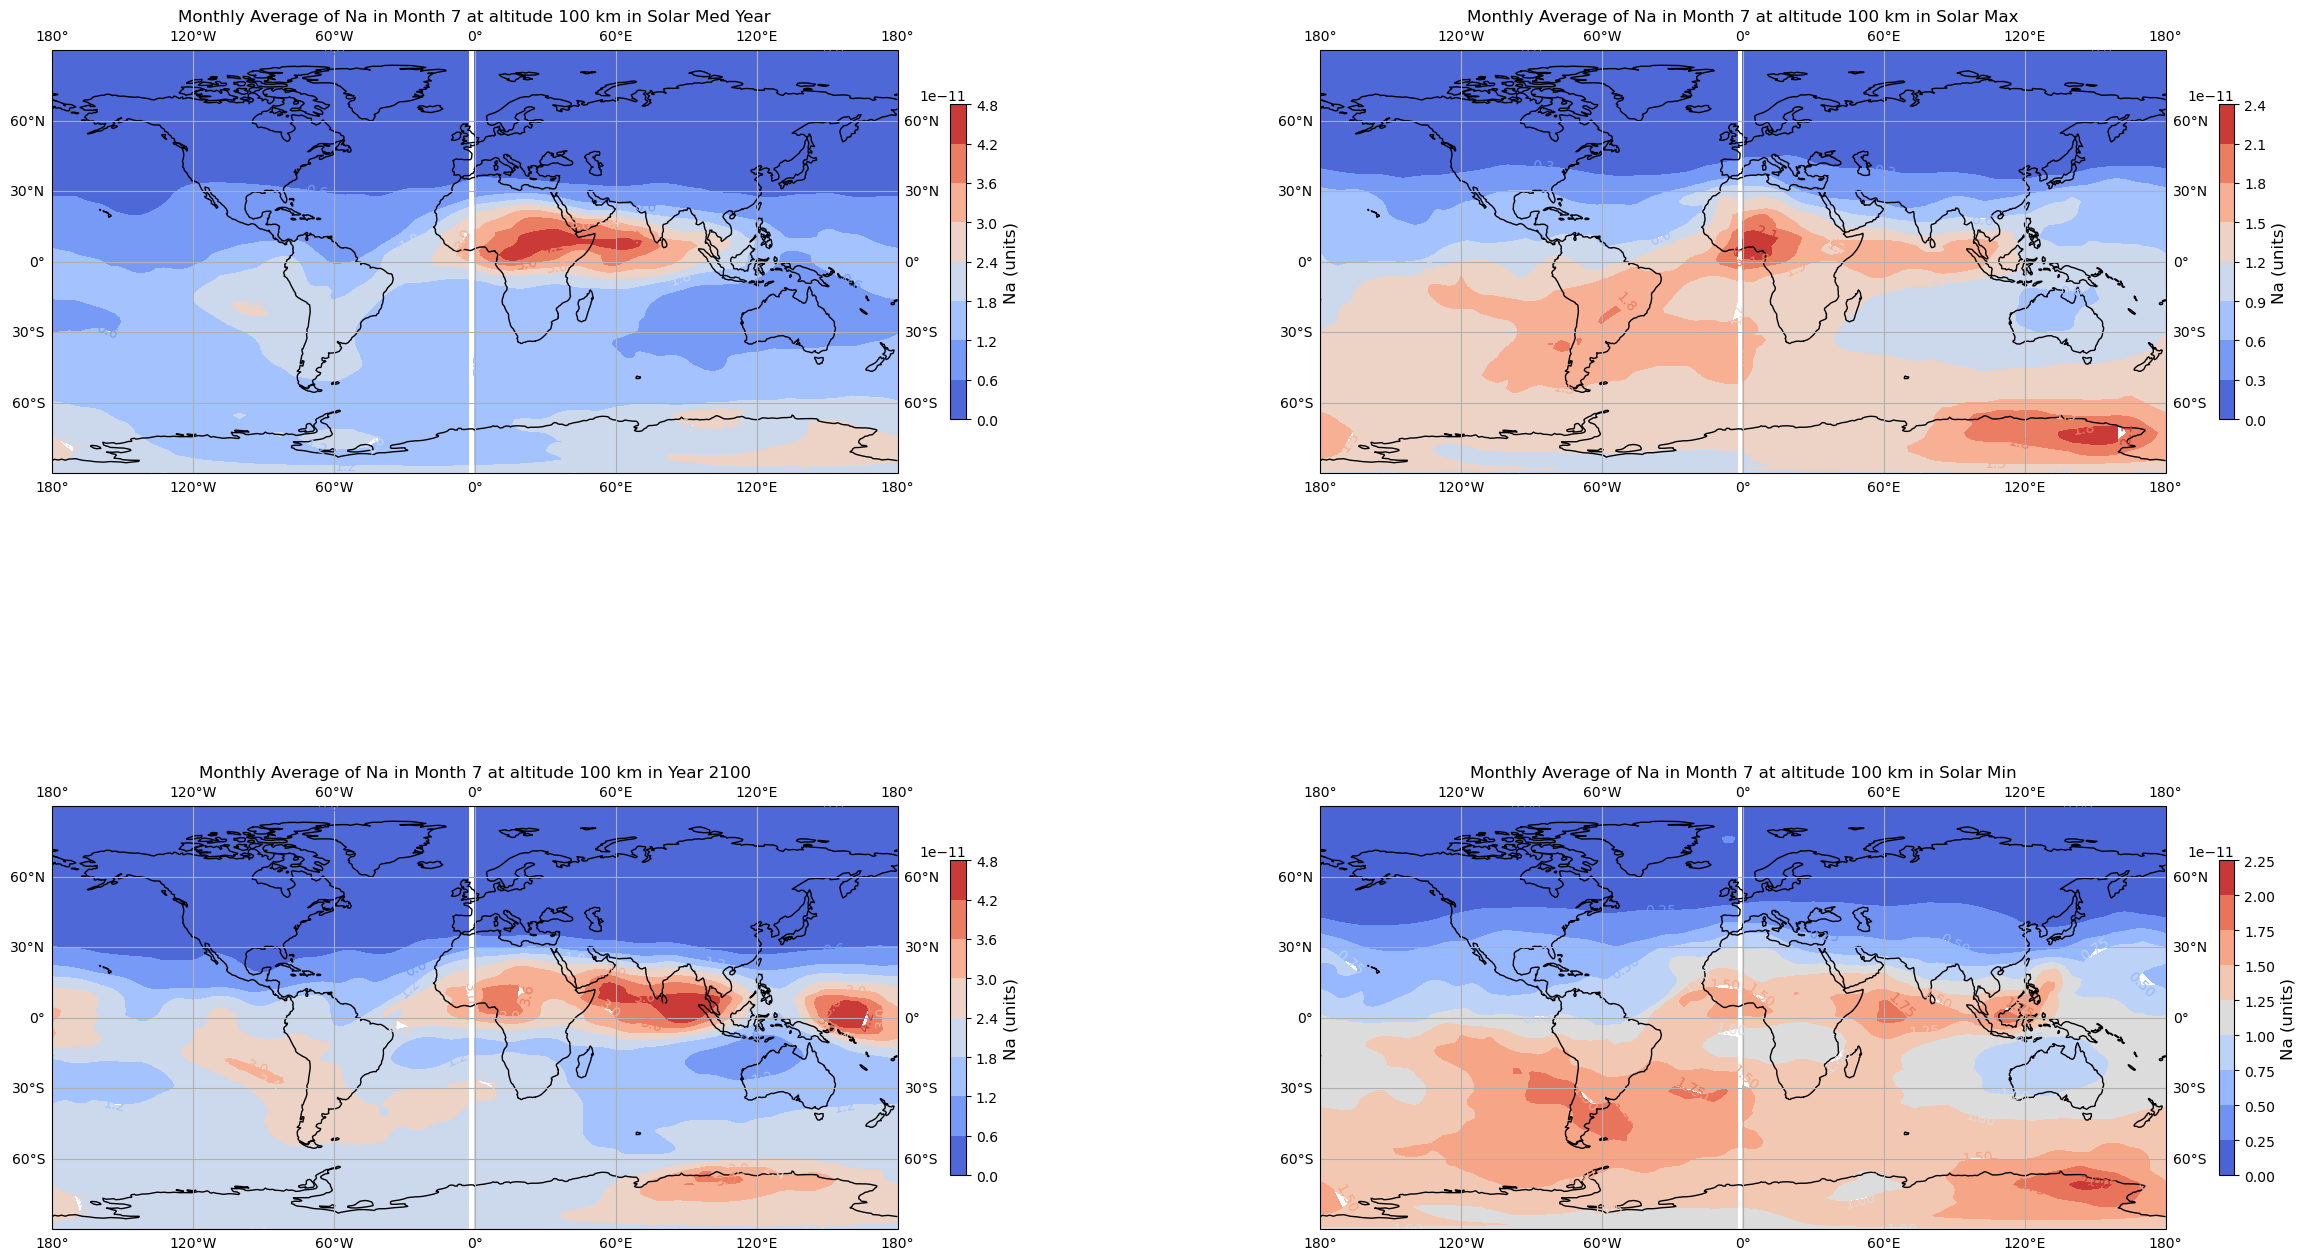

In [75]:
# Create a figure with Cartopy
fig, axes = plt.subplots(2,2,figsize=(30, 18), subplot_kw={'projection': ccrs.PlateCarree()})
    
# Contour plot of variable 
contour1 = axes[0,0].contourf(lon, 
                                lat, 
                                ds_2dmed, 
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                            )
plt.clabel(contour1, inline=True, fontsize=10)
cbar = plt.colorbar(contour1, ax=axes[0,0], orientation='vertical', shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[0,0].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Solar Med Year')
axes[0,0].coastlines()
axes[0,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour1} done!')


contour2 = axes[1,0].contourf(lon, 
                                lat, 
                                ds_2dcli,
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                             )
plt.clabel(contour2, inline=True, fontsize=10)
cbar = plt.colorbar(contour2, ax=axes[1,0], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[1,0].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Year 2100')
axes[1,0].coastlines()
axes[1,0].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour2} done!')


contour3 = axes[0,1].contourf(lon, 
                                lat, 
                                ds_2dmax,
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                             )
plt.clabel(contour3, inline=True, fontsize=10)
cbar = plt.colorbar(contour3, ax=axes[0,1], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[0,1].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Solar Max')
axes[0,1].coastlines()
axes[0,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour3} done!')



contour4 = axes[1,1].contourf(lon, 
                                lat, 
                                ds_2dmin, 
                                cmap = plt.get_cmap('coolwarm'),
                                transform=ccrs.PlateCarree(), 
                                # norm=colors.TwoSlopeNorm(vcenter=200)
                             )
plt.clabel(contour4, inline=True, fontsize=10)
cbar = plt.colorbar(contour4, ax=axes[1,1], orientation='vertical',shrink = 0.5) #, pad=0.05, aspect=30)
cbar.set_label(f'{var} (units)', fontsize=12)
axes[1,1].set_title(f'Monthly Average of {var} in Month {selected_month} at altitude {selected_alt} km in Solar Min')
axes[1,1].coastlines()
axes[1,1].gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
print(f'{contour4} done!')




# plt.savefig(f'/home/home02/cm21cmr/Sporadic-E-Project/Figures/{var}_comparison_alt-{selected_alt}_month-{selected_month}', dpi=400, bbox_inches='tight')
plt.show()
 